### Sales Forecast

**Motivation! What's the context?**
- In 2017 Olist started to forecast its monthly sales based on the average revenue from 3 months before. But now the company wants to be able to predict future sales more accurately with a wider time range (3 months).

**Why?**
- To efficiently allocate resources for future projects, growth and manage its cash flow. 

**Who are the stakeholders?**
- The financial sector will use the forecast to the set operating budgets and to project cash flows.
- And the marketing team, who will have the opportunity to schedule promotions if it appears sales <br>
will be weak and will be able to better allocate budget among other marketing activities.

**What is the deliverable?**
- A dashboard with the information about the forecast.


> **ps: We will use the data to forecast the second quarter of 2018 and the third quarter will be our "production data".**

## Agenda

[0.0 Loading Data](#0.0-Loading-Data)<br>
&nbsp;[0.1 Train and Test Data Frame](#0.1-Train-and-Test-Data-Frame)<br>

[1.0 ARIMA](#1.0-ARIMA)<br>

[2.0 Evaluation](#2.0-Evaluation)<br>
&nbsp;[2.1  Educative Storytelling](#2.1-Educative-Storytelling)<br>

[3.0 Final Results](#3.0-Final-Results)<br>

In [1]:
from notebook_utils.utils import *
from notebook_utils.ml_utils import *

import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

In [2]:
directory = Directory("1.3-pr-sales-prediction-arima-study")

## 0.0 Loading Data

Since We are not preprocessing any data we can use the project proposal serie itself.

In [3]:
df = pd.read_pickle(os.path.join(os.path.join(directory.DATA_DIR, 'sales_forecast_data'), 'olist_2017_forecasts_table_model.pkl'))
df.round(2)

known_revenue  estimated_revenue
year month                                  
2017 1          127482.37           15551.25
     2          271239.32           57997.55
     3          414330.95          132913.77
     4          390812.40          271017.55
     5          566851.40          358794.22
     6          490050.37          457331.58
     7          566299.08          482571.39
     8          645832.36          541066.95
     9          701077.49          567393.94
     10         751117.01          637736.31
     11        1153364.20          699342.29
     12         843078.29          868519.57
2018 1         1077887.46          915853.17
     2          966168.41         1024776.65
     3         1120598.24          962378.05
     4         1132878.93         1054884.70
     5         1128774.52         1047217.12
     6         1011978.29         1074233.35
     7         1027807.28         1058778.39
     8          985491.64         1060076.29

### 0.1 Train and Test Data Frame

In [4]:
y_train = df[:-5]['known_revenue']
y_test = df[-5:]['known_revenue']

## 1.0 ARIMA

    We beat the baseline. Now We can evaluate the model on the production
    data expecting an error of 5.7% above or below the real revenue value.

In [5]:
model = ARIMA(y_train.values, order=(2,0,0)).fit()
predictions = model.forecast(5)
september = model.forecast(6)[-1]
# evaluation(y_test, predictions)

evaluation(y_test[:3], predictions[:3], "\n2nd Quarter of 2018")


2nd Quarter of 2018
On average, our predictions are 5.7% above or below the real value.
Which means an error of about R$ 64,127.08


(64127.08, 5.7032082465927845)

In [6]:
# print(model.summary())

## 2.0 Evaluation

We would have done really great!

In [7]:
evaluation(y_test[3:], predictions[3:], "3rd Quarter of 2018")

3rd Quarter of 2018
On average, our predictions are 1.32% above or below the real value.
Which means an error of about R$ 13,165.92


(13165.92, 1.3199931793536126)

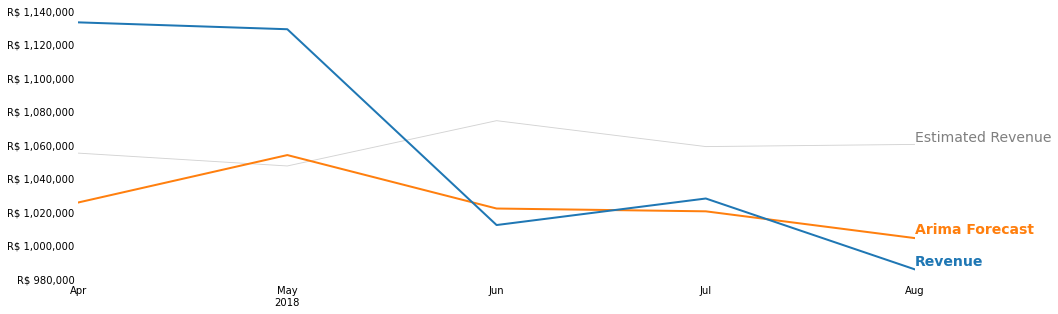

In [8]:
olist_forecast = df.copy()
olist_forecast['arima_forecast'] = np.concatenate( ( np.zeros(olist_forecast['known_revenue'][:-5].shape), predictions ) )

aux = olist_forecast[-5:].copy()
aux.index = pd.to_datetime(['2018-04-30', '2018-05-31', '2018-06-30',
                            '2018-07-31', '2018-08-31'])
plt.box(False)
aux['estimated_revenue'].plot(figsize=(15,5), color=['lightgrey'], linewidth=.9);
aux['arima_forecast'].plot(figsize=(15,5), color=['#ff7f0e'], linewidth=2);
ax = aux['known_revenue'].plot(figsize=(15,5), color=['#1f77b4'], linewidth=2);
plt.tick_params(axis='both', which='both', length=0)
plt.text("2018-08-31", 1062000, "Estimated Revenue", color='#7f7f7f', size=14)
plt.text("2018-08-31", 1007000, "Arima Forecast", color='#ff7f0e', size=14, weight='bold')
plt.text("2018-08-31", 988000, "Revenue", color='#1f77b4', size=14, weight='bold')
plt.ticklabel_format(axis="y", style="plain")
ax.yaxis.set_major_formatter('R$ {x:,.0f}')
plt.show()

### 2.1 Educative Storytelling

<font color='grey'><strong>Only  now I realized something... not a problem, just a minor unreality due to the possibility and my attempt to speed things (validation) up.</strong><br></font>

In [9]:
olist_forecast.replace(0, np.nan, inplace=True)
dates_index = ['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31']
olist_forecast.index = pd.to_datetime(dates_index)

**In the beginning of this project, Olist moving average predictive model has been showing large errors, even though it was getting lower.**

In [10]:
initial_environment = olist_forecast.copy()
initial_environment['error'] = initial_environment['known_revenue'] - initial_environment['estimated_revenue']
# initial_environment.index

In [11]:
q1 = initial_environment.loc[['2017-01-31', '2017-02-28', '2017-03-31']]
q2 = initial_environment.loc[['2017-04-30', '2017-05-31', '2017-06-30']]
q3 = initial_environment.loc[['2017-07-31', '2017-08-31', '2017-09-30']]
q4 = initial_environment.loc[['2017-10-31', '2017-11-30', '2017-12-31']]

evaluation(q1['known_revenue'], q1['estimated_revenue'], "1st Quarter of 2017")
evaluation(q2['known_revenue'], q2['estimated_revenue'], "\n2nd Quarter of 2017")
evaluation(q3['known_revenue'], q3['estimated_revenue'], "\n3rd Quarter of 2017")
evaluation(q4['known_revenue'], q4['estimated_revenue'], "\n4th Quarter of 2017")

q1 = initial_environment.loc[['2018-01-31', '2018-02-28', '2018-03-31']]
q2 = initial_environment.loc[['2018-04-30', '2018-05-31', '2018-06-30']]
evaluation(q1['known_revenue'], q1['estimated_revenue'], "\n\n1st Quarter of 2018")
evaluation(q2['known_revenue'], q2['estimated_revenue'], "\n2nd Quarter of 2018");

1st Quarter of 2017
On average, our predictions are 78.11% above or below the real value.
Which means an error of about R$ 202,196.69

2nd Quarter of 2017
On average, our predictions are 24.68% above or below the real value.
Which means an error of about R$ 120,190.27

3rd Quarter of 2017
On average, our predictions are 16.69% above or below the real value.
Which means an error of about R$ 107,392.22

4th Quarter of 2017
On average, our predictions are 19.16% above or below the real value.
Which means an error of about R$ 197,614.63


1st Quarter of 2018
On average, our predictions are 11.74% above or below the real value.
Which means an error of about R$ 126,287.57

2nd Quarter of 2018
On average, our predictions are 6.75% above or below the real value.
Which means an error of about R$ 73,935.56


**For the next Quarter, Olist needs a model with an error lower than 6.75%.**

**And for our model be actually better than the current moving average, its error must be less than 5.29% when forecasting the 3rd quarter.**

In [12]:
q3 = initial_environment.loc[['2018-07-31', '2018-08-31']]
evaluation(q3['known_revenue'], q3['estimated_revenue'], "\n3rd Quarter of 2018");


3rd Quarter of 2018
On average, our predictions are 5.29% above or below the real value.
Which means an error of about R$ 52,777.88


In [13]:
# initial_environment.index

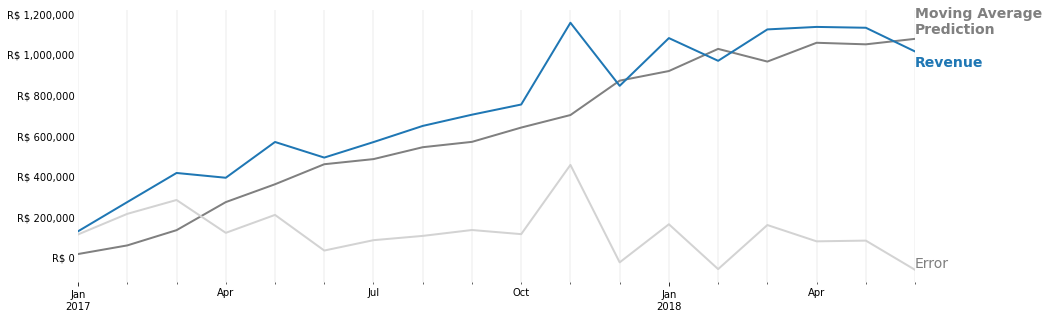

In [14]:
aux = initial_environment.drop(pd.to_datetime(['2018-07-31', '2018-08-31']))
x = '2018-06-30'
plt.box(False)
aux['estimated_revenue'].plot(figsize=(15,5), color=['grey'], linewidth=2);
ax = aux['known_revenue'].plot(color=['#1f77b4'], linewidth=2);
aux['error'].plot(color=['lightgrey'], linewidth=2);
plt.text(x=x, y=940000, s="Revenue", color='#1f77b4', size=14, weight='bold')
plt.text(x=x, y=1100000, s="Moving Average\nPrediction", color='grey', size=14, weight='bold')
plt.text(x=x, y=-50000, s="Error", color='grey', size=14)
plt.tick_params(axis='y', length=0)
plt.grid(axis='x', which='both', linewidth=.25)
plt.ticklabel_format(axis="y", style="plain")
ax.yaxis.set_major_formatter('R$ {x:,.0f}')
plt.show()

**The Project was sucessfull, since We could deacrease the error when predicting the sales from second quarter of 2018. Now, Olist can forecast the 3rd quarter expecting an error of 5.7% above or below the real revenue value, instead of 6.7%.**

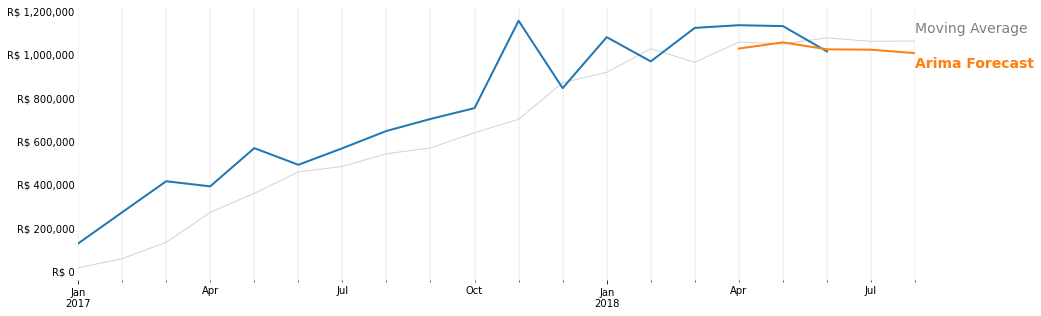

In [15]:
aux = initial_environment.copy()
aux.loc['2018-07-31':, 'known_revenue'] = np.nan

x = '2018-08-31'
plt.box(False)
aux['estimated_revenue'].plot(figsize=(15,5), color=['lightgrey'], linewidth=1);
ax = aux['known_revenue'].plot(color=['#1f77b4'], linewidth=2);
aux['arima_forecast'].plot(color=['#ff7f0e'], linewidth=2);
plt.text(x=x , y=1100000, s="Moving Average", color='grey', size=14)
plt.text(x=x , y=940000, s="Arima Forecast", color='#ff7f0e', size=14,  weight='bold')
plt.tick_params(axis='y', length=0)
plt.grid(axis='x', which='both', linewidth=.25)
plt.ticklabel_format(axis="y", style="plain")
ax.yaxis.set_major_formatter('R$ {x:,.0f}')
plt.show()

**Until now the results have been amazing with a real error of 1.32%.**

In [16]:
olist_sales = olist_forecast.copy()

# error = 5.7/100
# olist_sales['error'] = olist_sales['arima_forecast'] * error
# olist_sales.loc['2018-04-30':'2018-06-30', ['error']] = np.nan
# olist_sales['max_confidence_interval'] = olist_sales['arima_forecast'] + olist_sales['error']
# olist_sales['min_confidence_interval'] = olist_sales['arima_forecast'] - olist_sales['error']
# olist_sales.round(2)

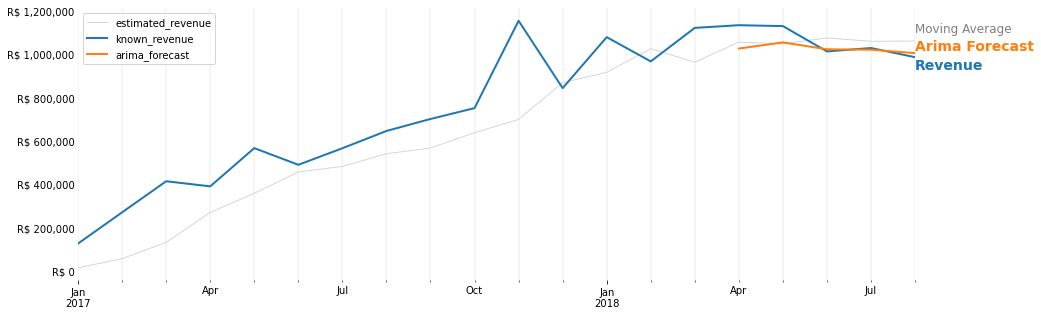

In [17]:
x = '2018-08-30'
plt.box(False)
olist_sales['estimated_revenue'].plot(figsize=(15,5), color=['lightgrey'], linewidth=.9);
ax = olist_sales['known_revenue'].plot(color=['#1f77b4'], linewidth=2);
olist_sales['arima_forecast'].plot(color=['#ff7f0e'], linewidth=2);
# olist_sales['max_confidence_interval'].plot(color=['orange'], linewidth=1);
# olist_sales['min_confidence_interval'].plot(color=['orange'], linewidth=1);
plt.text(x=x , y=1100000, s="Moving Average", color='grey', size=12)
plt.text(x=x , y=1019000, s="Arima Forecast", color='#ff7f0e', size=14,  weight='bold')
plt.text(x=x , y=930000, s="Revenue", color='#1f77b4', size=14,  weight='bold')

plt.tick_params(axis='y', length=0)
plt.legend()
plt.grid(axis='x', which='both', linewidth=.25)
plt.ticklabel_format(axis="y", style="plain")
ax.yaxis.set_major_formatter('R$ {x:,.0f}')
plt.show()

**And for next month**

In [18]:
estimated_september = olist_sales.loc['2018-06-30':'2018-08-31',  'estimated_revenue'].mean()

september_data = [np.nan, estimated_september, september]
september_data = pd.DataFrame(september_data, columns=[pd.to_datetime('2018-09-30')]).T
september_data.columns = olist_sales.columns
olist_sales = olist_sales.append(september_data)

In [19]:
known_revenue = olist_sales['known_revenue']
arima_forecast = known_revenue.copy()
arima_forecast.loc['2018-04-30':'2018-09-30'] = olist_sales.loc['2018-04-30':'2018-09-30', 'arima_forecast']
estimated_revenue = known_revenue.copy()
estimated_revenue.loc['2018-04-30':'2018-09-30'] = olist_sales.loc['2018-04-30':'2018-09-30', 'estimated_revenue']

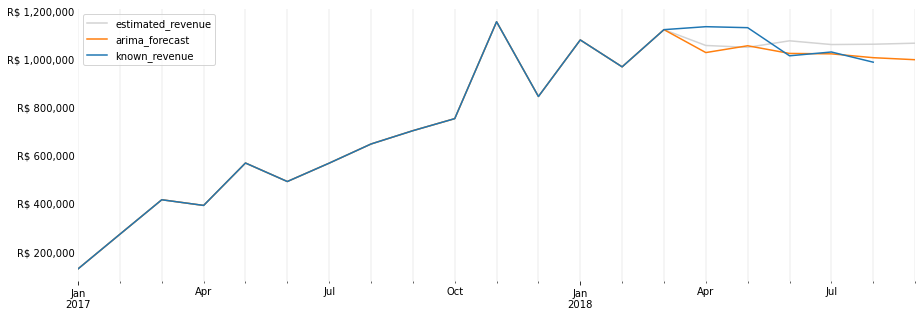

In [20]:
plt.box(False)
estimated_revenue.plot(color='lightgrey', label='estimated_revenue')
arima_forecast.plot(color='#ff7f0e', label='arima_forecast')
ax = known_revenue.plot(figsize=(15,5), color = '#1f77b4', label='known_revenue')
plt.tick_params(axis='y', length=0)
plt.legend()
plt.grid(axis='x', which='both', linewidth=.25)
plt.ticklabel_format(axis="y", style="plain")
ax.yaxis.set_major_formatter('R$ {x:,.0f}')
plt.show()

## 3.0 Final Results

**The problem with that approach is that I am using training data up to 1st quarter to forecast the 3rd.**
 
**What in reality, in this case, we need to retrain the model with the 2nd quarter data joined and then forecast the 3rd.**

In [21]:
known_revenue = olist_sales['known_revenue'].copy()
# known_revenue.loc['2018-09-30'] = olist_sales.loc['2018-09-30', 'arima_forecast']

<AxesSubplot:>

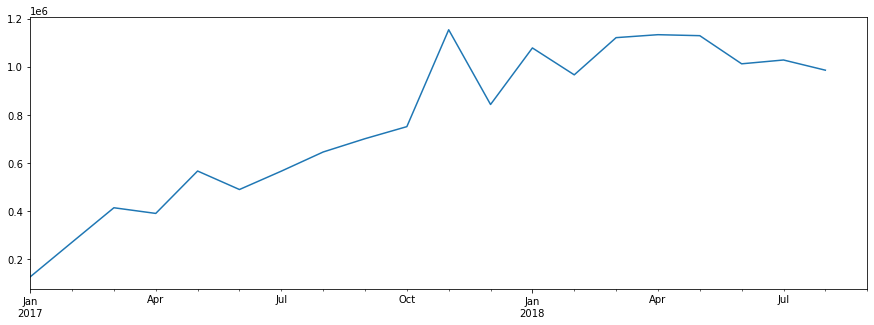

In [22]:
known_revenue.plot(figsize=(15,5))

In [23]:
model = ARIMA(known_revenue[:-3].values, order=(2,0,0)).fit()
predictions = model.forecast(2)

arima_forecast = known_revenue.copy()
arima_forecast.loc['2018-07-31'] = predictions[0]
arima_forecast.loc['2018-08-31'] = predictions[1]
# arima_forecast.loc['2018-09-30'] = predictions[2]
arima_forecast.name = 'arima_forecast'

In [24]:
validation = pd.concat([known_revenue, arima_forecast], axis=1)[-3:-1]
evaluation(validation['known_revenue'], validation['arima_forecast'], "3rd Quarter of 2018");

3rd Quarter of 2018
On average, our predictions are 3.18% above or below the real value.
Which means an error of about R$ 31,915.91


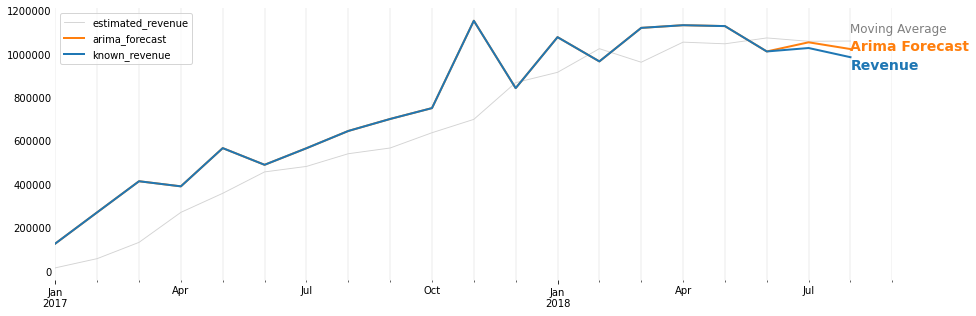

In [25]:
plt.box(False)
olist_sales['estimated_revenue'][:-1].plot(figsize=(15,5), color=['lightgrey'], linewidth=.9);
arima_forecast.plot(color=['#ff7f0e'], linewidth=2)
known_revenue.plot(figsize=(15,5), color=['#1f77b4'], linewidth=2)
plt.text(x=x , y=1100000, s="Moving Average", color='grey', size=12)
plt.text(x=x , y=1019000, s="Arima Forecast", color='#ff7f0e', size=14,  weight='bold')
plt.text(x=x , y=930000, s="Revenue", color='#1f77b4', size=14,  weight='bold')

plt.tick_params(axis='y', length=0)
plt.legend()
plt.grid(axis='x', which='both', linewidth=.25)
plt.ticklabel_format(axis="y", style="plain")
ax.yaxis.set_major_formatter('R$ {x:,.0f}')
plt.show()